In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
pd.set_option('display.max_colwidth', 0)

# might be needed depending on your version of Jupyter
%matplotlib inline

In [207]:
data_info = pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')

In [208]:
data_info

,Description
LoanStatNew,
loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
term,The number of payments on the loan. Values are in months and can be either 36 or 60.
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if the loan originates.
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when applying for the loan.*
emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
home_ownership,"The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER"


In [254]:
def feat_info(col_name):
    '''
    This function will render the description of the columns from info dataframe.
    '''
    return (col_name+" in our table refers to the "+data_info.loc[col_name]['Description'])

In [210]:
df = pd.read_csv('lending_club_loan_two.csv')

In [211]:
df.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

# #1 Exploratory Data Analysis

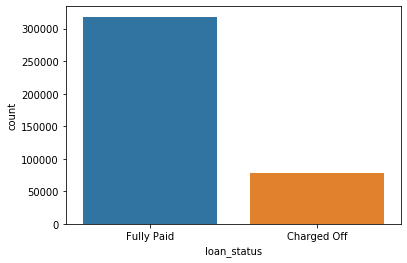

In [213]:
sb.countplot(df['loan_status'])

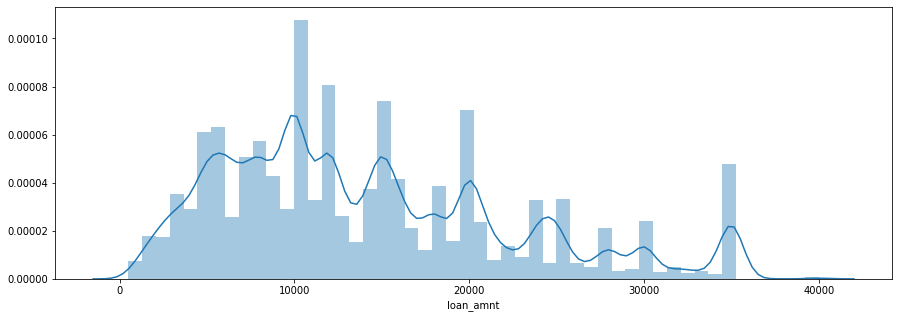

In [214]:
plt.figure(figsize=(15,5))
sb.distplot(df['loan_amnt'])

><h2>Correlation Analysis</h2>

In [215]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


>Using heat map to visualize our correlation.

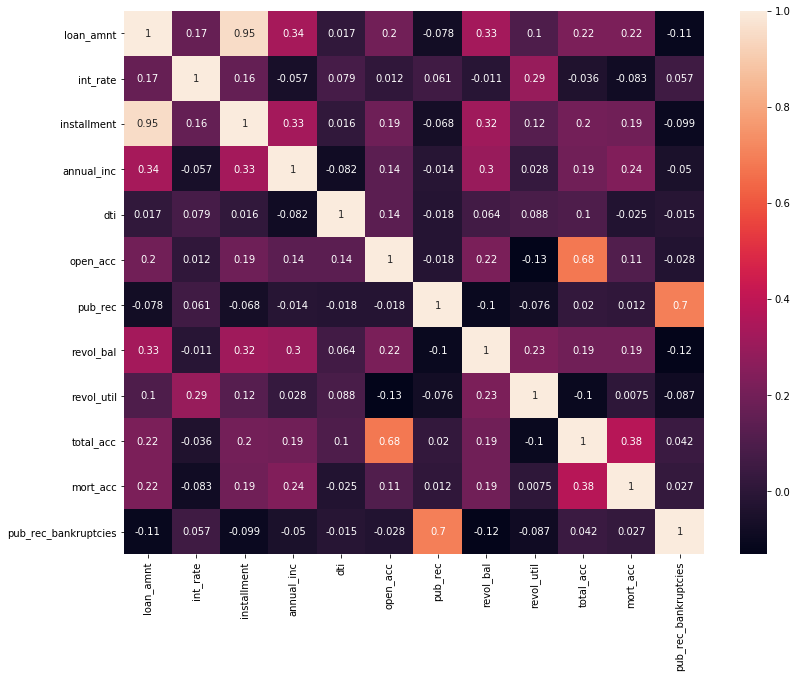

In [216]:
plt.figure(figsize=(13,10))
sb.heatmap(df.corr(), annot=True)

Installment have almost perfect correlation with the data.
>Exploring **Installment** feature to check if make sense more than this.

In [261]:
feat_info('installment')

'installment in our table refers to the The monthly payment owed by the borrower if the loan originates.'

In [260]:
feat_info('loan_amnt')

'loan_amnt in our table refers to the The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.'

---

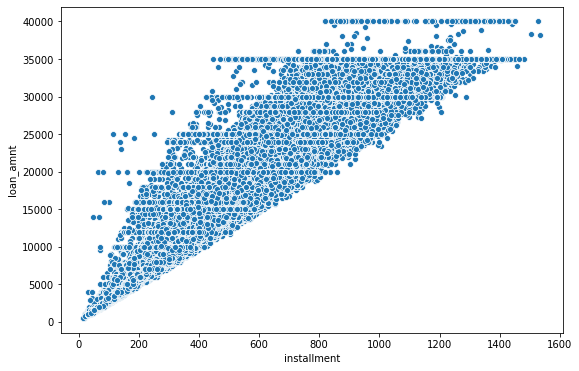

In [219]:
plt.figure(figsize=(9,6))
sb.scatterplot('installment', 'loan_amnt', data=df)

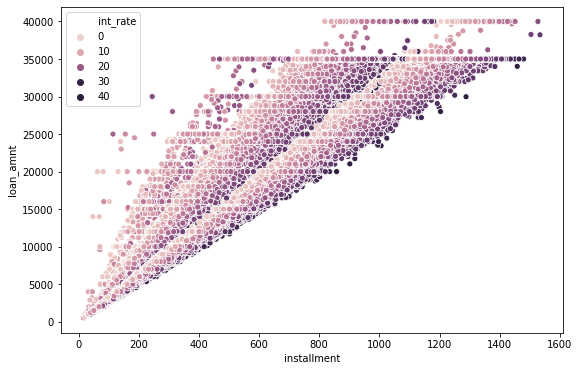

In [220]:
plt.figure(figsize=(9,6))
sb.scatterplot('installment', 'loan_amnt', data=df, hue='int_rate')

In [221]:
#sb.scatterplot('installment', 'term', data=df, hue='int_rate')

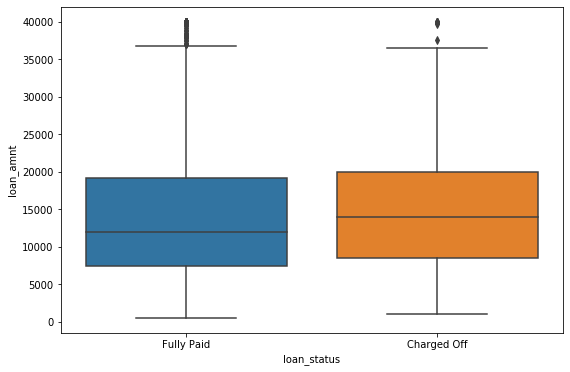

In [222]:
plt.figure(figsize=(9,6))
sb.boxplot('loan_status', 'loan_amnt', data=df)

In [223]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [224]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [225]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

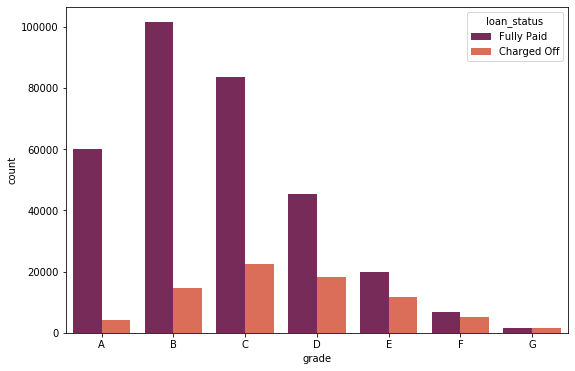

In [226]:
plt.figure(figsize=(9,6))
sb.countplot('grade', hue='loan_status',data=df, palette='rocket', order=sorted(df['grade'].unique()))

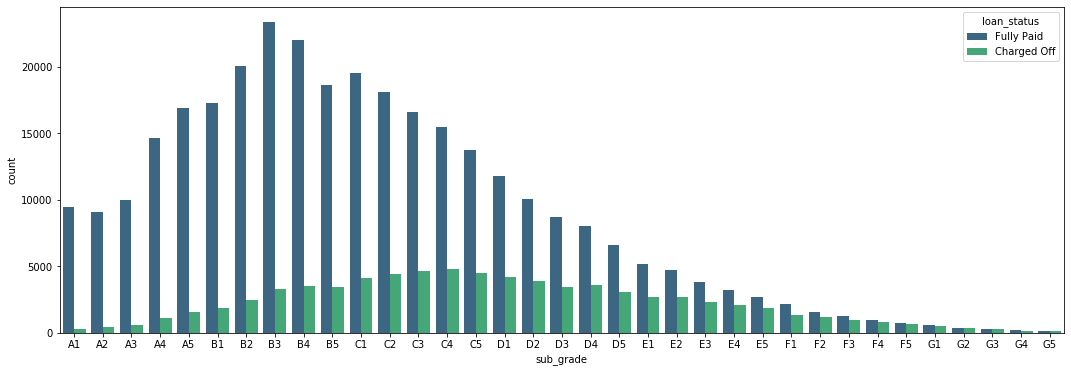

In [227]:
plt.figure(figsize=(18,6))
sb.countplot('sub_grade', hue='loan_status',data=df, palette='viridis', order=sorted(df['sub_grade'].unique()))

> Looks like F and G grade doesn't get paid back that often.

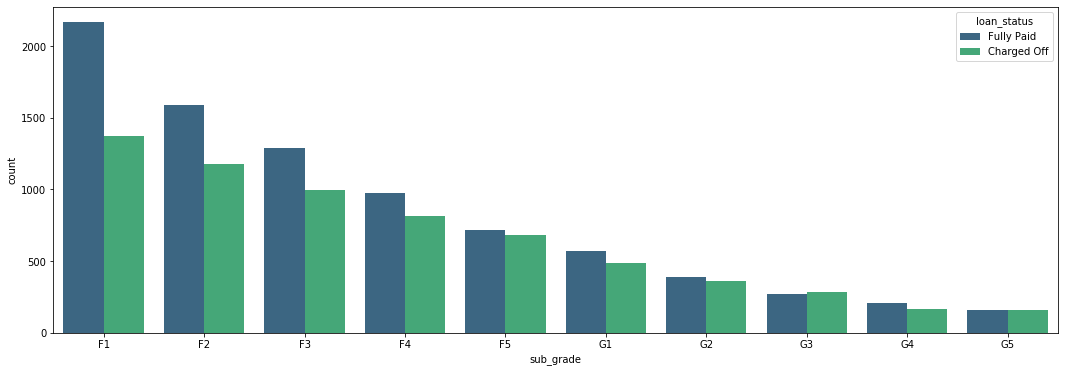

In [228]:
f_and_g_df = df[(df['grade']=='G')|(df['grade']=='F')]

plt.figure(figsize=(18,6))
sb.countplot('sub_grade', hue='loan_status',data=f_and_g_df, palette='viridis', order=sorted(f_and_g_df['sub_grade'].unique()))

><h3> Let's analyze loan_status </h3> </br>

>Remapping loan_status categorical column to loan_repaid

In [229]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1, 'Charged Off':0})

In [230]:
df.drop('loan_status', axis=1, inplace=True)

In [231]:
df.corr()['loan_repaid'].sort_values(ascending=False)

loan_repaid             1.000000
mort_acc                0.073111
annual_inc              0.053432
total_acc               0.017893
revol_bal               0.010892
pub_rec_bankruptcies   -0.009383
pub_rec                -0.019933
open_acc               -0.028012
installment            -0.041082
loan_amnt              -0.059836
dti                    -0.062413
revol_util             -0.082373
int_rate               -0.247758
Name: loan_repaid, dtype: float64

> **mort_acc has the highest positive correlation with the loan_status whereas int_rate have the highest negative correlation**

In [259]:
print(feat_info('mort_acc'))
print(feat_info('int_rate'))

mort_acc in our table refers to the Number of mortgage accounts.
int_rate in our table refers to the Interest Rate on the loan


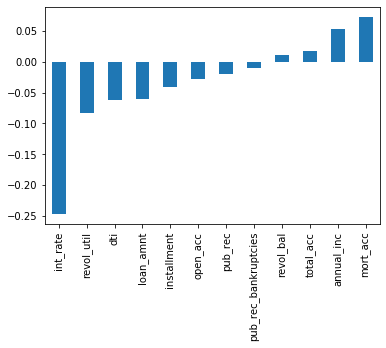

In [251]:
df.corr()['loan_repaid'].sort_values()[:-1].plot(kind='bar')

---
---

# #2 Data Preprocessing

In [264]:
df.isna().sum()

loan_amnt               0    
term                    0    
int_rate                0    
installment             0    
grade                   0    
sub_grade               0    
emp_title               22927
emp_length              18301
home_ownership          0    
annual_inc              0    
verification_status     0    
issue_d                 0    
purpose                 0    
title                   1755 
dti                     0    
earliest_cr_line        0    
open_acc                0    
pub_rec                 0    
revol_bal               0    
revol_util              276  
total_acc               0    
initial_list_status     0    
application_type        0    
mort_acc                37795
pub_rec_bankruptcies    535  
address                 0    
loan_repaid             0    
dtype: int64

In [270]:
100* df.isna().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

>We have emp_title and emp_length with 5 and 4 percentage of missing data respectively.</br>

>Checking if we can drop them from the dataframe.

In [269]:
df['emp_title']

0         Marketing               
1         Credit analyst          
2         Statistician            
3         Client Advocate         
4         Destiny Management Inc. 
                   ...            
396025    licensed bankere        
396026    Agent                   
396027    City Carrier            
396028    Gracon Services, Inc    
396029    Internal Revenue Service
Name: emp_title, Length: 396030, dtype: object

In [271]:
df['emp_title'].nunique()

173105